In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import threading
from datetime import timedelta
import simulate

In [9]:
spx = pd.read_csv('^GSPC.csv', index_col=0)

start = dt.date(2020, 1, 1)
end = dt.date(2050, 12, 31)


Market = simulate.Market(spx.iloc[-7500:, -2], start, end)

0.09297562032766951


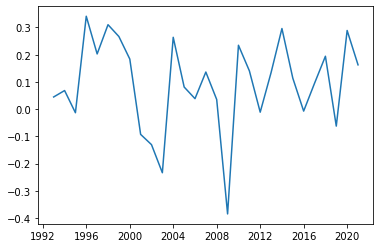

In [10]:
our_data = spx.iloc[-7500:, :]

our_data.index = pd.to_datetime(our_data.index)

in_years = our_data['Adj Close'].asfreq('BYS', 'pad')
plt.plot(in_years.pct_change())
print(in_years.pct_change().mean())

In [29]:
def draw():
    market = Market.garch()
    market['Price'] = market['Price'].pct_change().values
    return market


In [30]:
means = []
for _ in range(16):
    t=threading.Thread(target=draw)
    t.start()
    means.append(market['Price'].pct_change().mean())


In [31]:
print(means)

[-2.3966379669655415, -2.3966379669655415, -2.3966379669655415, -2.3966379669655415, -2.3966379669655415, -2.3966379669655415, -2.3966379669655415, -2.3966379669655415, -2.3966379669655415, -2.3966379669655415, -2.3966379669655415, -2.3966379669655415, -2.3966379669655415, -2.3966379669655415, -2.3966379669655415, -2.3966379669655415]


In [6]:
actual = our_data['Adj Close'].pct_change().mean()
print(actual)
print(np.mean(means))

0.00037462970208011954
-1.3230874868550286


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.hist(x=means)
#for i in range(len(market['Price'].pct_change())):
    #ax.axvline(x=market['Price'].pct_change().iloc[i], color='r')

In [ ]:
means = []
for i in range(10000):
    market = Market.garch()
    market['Price'] = market['Price'].pct_change().values
    means.append(market['Price'].pct_change().mean())
